# Support Vector Regressor Implementation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [4]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [5]:
X

array([[-0.99498132,  0.54809126],
       [ 0.15071024, -0.82786571],
       [ 0.71196936, -0.40053576],
       ...,
       [-0.60852812,  1.8143697 ],
       [-0.0540282 ,  0.56893126],
       [ 0.04236456,  0.00516769]])

In [6]:
y

array([-1.01812558e+01, -2.25528441e+01,  9.34573594e+00,  2.94234522e+01,
       -1.03855504e+01, -6.28065051e+01, -2.37017443e+00,  2.12851798e+01,
        4.25306688e+01,  1.08147022e+02,  1.42910139e+01,  2.88567460e+01,
       -8.89848599e+01, -1.33761347e+00,  6.28109463e+01,  7.26120981e+01,
       -4.17855381e+00, -4.29142960e+01,  8.90091768e+00, -6.54735326e+01,
        1.30831455e+01,  2.93279682e+01, -1.40417983e+01,  1.48616309e+01,
       -3.36887832e+01,  1.67047531e+01,  5.61321810e+00,  2.30001793e+01,
        3.78023724e+01, -3.24791754e+01, -6.71433170e+00,  1.18188978e+02,
       -1.06793271e+01, -6.64197120e+01,  7.72018440e+01,  1.05277440e+01,
        2.04612291e+01,  2.80879754e+01, -1.02843550e+02,  6.91661424e+01,
        3.58184853e+01,  7.66779971e+01, -6.69945747e+01, -2.22430604e+00,
        9.57636520e+01, -8.52577072e+00, -4.24065591e+01,  7.24172786e+00,
        8.63590204e+01, -3.43806976e+01, -1.60917715e+01, -6.33719815e+01,
        1.68867021e+01, -

In [7]:
pd.DataFrame(X)[0]

0     -0.994981
1      0.150710
2      0.711969
3      1.004996
4      0.482655
         ...   
995    0.246338
996   -1.649805
997   -0.608528
998   -0.054028
999    0.042365
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

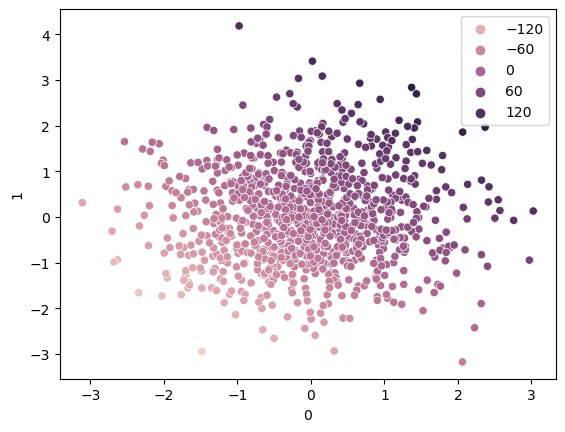

In [8]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [10]:
from sklearn.svm import SVR

In [11]:
svr=SVR(kernel='linear')

In [12]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [13]:
svr.coef_

array([[36.39475637, 38.37083219]])

In [14]:
## Prediction
y_pred=svr.predict(X_test)

In [16]:
y_pred

array([ 1.40302818e+01,  5.88722342e+01,  1.07078911e+02,  3.00225572e+01,
       -4.93775913e+01, -1.65777434e+01, -1.41843219e+01, -2.34680540e+01,
        3.15107800e+01, -8.56677001e+01,  2.47164122e+01,  7.00854873e+01,
        1.07150696e+02, -7.04198937e+01, -2.54845404e+01,  4.95758216e+01,
       -1.48660677e+01, -6.08221039e+01,  1.24869691e+02,  1.27957256e+01,
        3.13351970e+00, -2.03997776e+01, -3.84254815e+00, -1.03593057e+01,
       -1.81250725e+00,  1.88800182e+00,  1.56060714e-01, -6.51372113e+00,
       -2.40597333e+01,  2.92276440e+00, -7.86293082e+01, -5.30455287e+01,
        9.01965002e-01,  7.85757218e+00,  2.84227315e+01,  6.05523590e+01,
       -2.37994105e+01, -1.26966500e+01,  3.90271796e+01, -5.13866392e+01,
       -6.23262880e+01, -2.52255394e+01, -7.18847024e+01, -3.16827563e+01,
       -4.82724015e+00,  9.31987346e+01,  5.26395375e+01,  3.33561732e+01,
       -1.17542545e+01,  9.19183306e+00,  2.27704401e+01,  2.84041981e+01,
        5.15952713e+01, -

In [17]:
from sklearn.metrics import r2_score

In [18]:
print(r2_score(y_test,y_pred))

0.9965772115106595


## Hyperparametere Tuning With SVR


In [20]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [21]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [22]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.969 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.974 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.974 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.971 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.972 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.969 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.974 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.974 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.971 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.972 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [23]:
grid.best_params_

{'C': 100, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [24]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9966005121621003
